In [3]:
# Import libraries

from keras.models import Sequential
from keras.layers import Conv2D, Activation,Dropout
from keras.models import Model,load_model
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow.python.keras.engine
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import time


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#!unzip "/content/drive/MyDrive/CNN.zip" -d "/content/dataset/"

In [6]:
#!pip install tensorflow-gpu

In [7]:
train_dir = '/home/devokba/Desktop/CNN/TRAIN/'
test_dir = '/home/devokba/Desktop/CNN/TEST/'

def load_dataset(path):
    data = load_files(path) #load all files from the path
    files = np.array(data['filenames']) #get the file  
    targets = np.array(data['target'])#get the the classification labels as integer index
    target_labels = np.array(data['target_names'])#get the the classification labels 
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Training set size :  5602
Testing set size :  2403


In [8]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.30,random_state = 1)


In [9]:
print ("x_train shape: " + str(x_train.shape))
print ("x_train shape: " + str(y_train.shape))
print ("x_validate shape: " + str(x_validate.shape))
print ("y_validate shape: " + str(y_validate.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

x_train shape: (3921,)
x_train shape: (3921,)
x_validate shape: (1681,)
y_validate shape: (1681,)
x_test shape: (2403,)
y_test shape: (2403,)


In [10]:
# Convert jpg file to numpy array to feed to the CNN.
#By using Opencv .

def convert_image_to_array(files):
    width, height, channels = 224, 224, 3
    images_as_array = np.empty((files.shape[0], width, height, channels), dtype=np.uint8) #define train and test data shape
    for idx,file in enumerate(files):
        img = cv2.imread(file)
        #print(img.shape)
        res = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC) #As images have different size, resizing all images to have same shape of image array

     
        images_as_array[idx] = res
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_validate))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Training set shape :  (3921, 224, 224, 3)
Validation set shape :  (1681, 224, 224, 3)
Test set shape :  (2403, 224, 224, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
y_validate = y_validate.reshape(y_validate.shape[0],1)

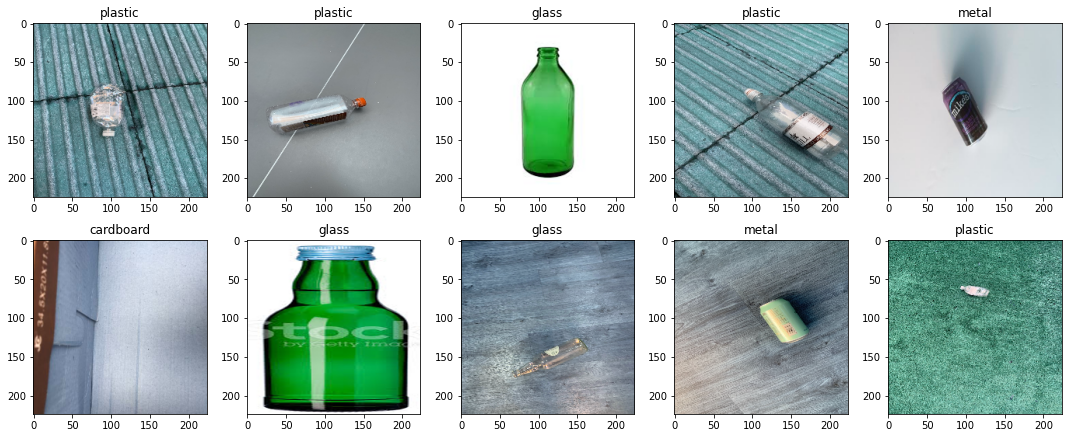

In [12]:
plt.figure(figsize=(15,15))
classes = ['cardboard','glass','metal','plastic']
for i in range(1,11):
    index = np.random.randint(x_train.shape[0])
    plt.subplot(5, 5, i)
    plt.imshow(np.squeeze(x_train[index]), cmap='cool')
    plt.title(classes[int(y_train[index])])
    plt.tight_layout()
plt.show() 

In [13]:
from glob import glob 

className = glob(train_dir + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  4


In [14]:
import os 
path = '/home/devokba/Desktop/CNN/'
total = 0
counts = {}
for root, dirs, files in os.walk(path):
    if not dirs:
        print(f'{root}: {len(files)}')
        counts[root] = len(files)
        total += len(files)

/home/devokba/Desktop/CNN/TEST/cardboard: 268
/home/devokba/Desktop/CNN/TEST/glass: 971
/home/devokba/Desktop/CNN/TEST/plastic: 793
/home/devokba/Desktop/CNN/TEST/metal: 371
/home/devokba/Desktop/CNN/Garbage classification/paper: 593
/home/devokba/Desktop/CNN/Garbage classification/cardboard: 403
/home/devokba/Desktop/CNN/Garbage classification/glass: 501
/home/devokba/Desktop/CNN/Garbage classification/plastic: 482
/home/devokba/Desktop/CNN/Garbage classification/metal: 410
/home/devokba/Desktop/CNN/TRAIN/cardboard: 623
/home/devokba/Desktop/CNN/TRAIN/glass: 2264
/home/devokba/Desktop/CNN/TRAIN/plastic: 1850
/home/devokba/Desktop/CNN/TRAIN/metal: 865
/home/devokba/Desktop/CNN/.ipynb_checkpoints: 3
/home/devokba/Desktop/CNN/data-set/paper: 1048
/home/devokba/Desktop/CNN/data-set/cardboard: 891
/home/devokba/Desktop/CNN/data-set/glass: 3235
/home/devokba/Desktop/CNN/data-set/plastic: 2644
/home/devokba/Desktop/CNN/data-set/metal: 1236
/home/devokba/Desktop/CNN/data-set/trash: 697
/home/

In [15]:
# Convolutional Neural Network - CNN 

model = Sequential()
model.add(Conv2D(16,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())


model.add(Conv2D(32,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(512,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,kernel_regularizer='l2'))
model.add(Activation("relu"))
model.add(Dropout(0.7))
model.add(Dense(256,kernel_regularizer='l2'))
model.add(Activation("relu"))
model.add(Dropout(0.7))

model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"]) 
batch_size = 128 

2022-05-01 00:21:50.087948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 00:21:50.196778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 00:21:50.197290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 00:21:50.205151: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

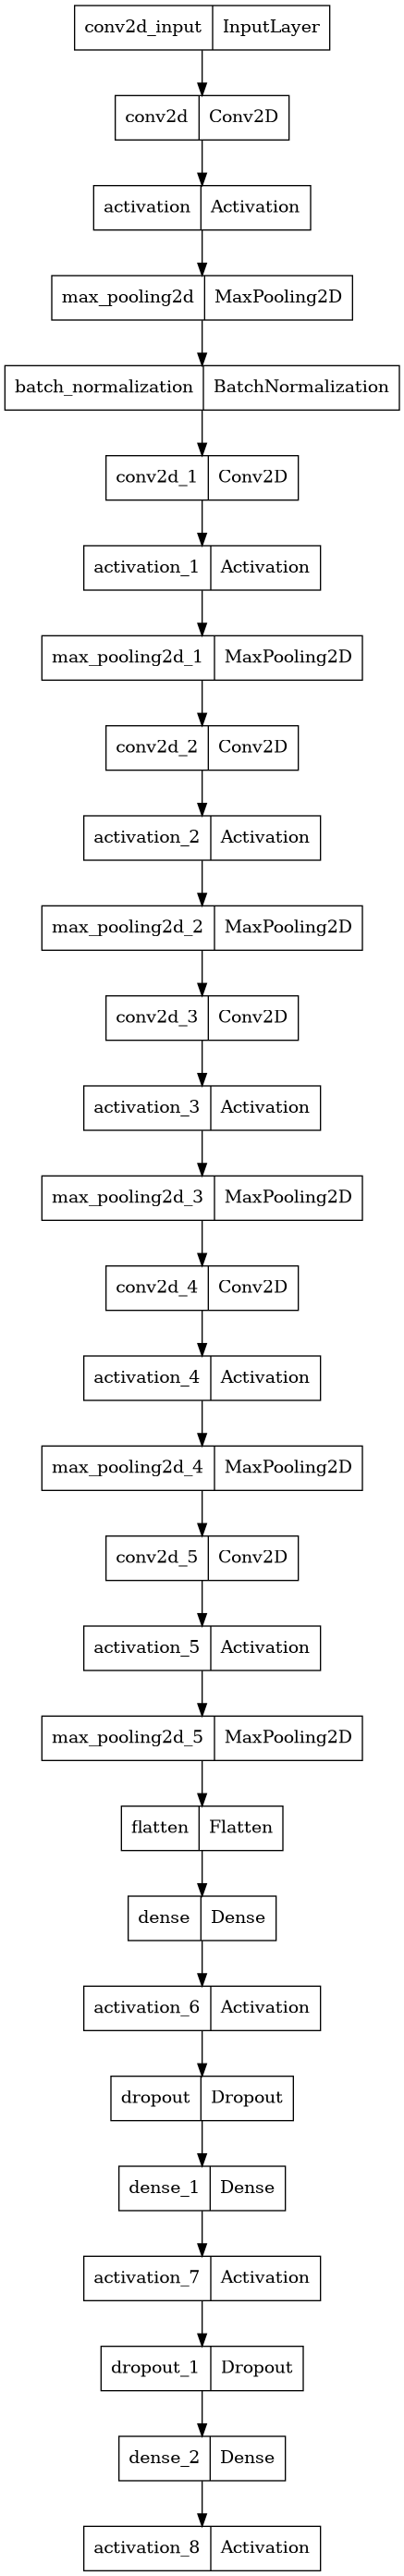

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [19]:
train_datagen = ImageDataGenerator(rescale= 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,) 
test_datagen = ImageDataGenerator(rescale= 1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 5602 images belonging to 4 classes.
Found 2403 images belonging to 4 classes.


In [464]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=30, mode='max', verbose=1)
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=30, min_lr=0.001)

In [465]:
from gc import callbacks
hist = model.fit(
        train_generator,
        epochs=50,
        validation_data = test_generator,
        callbacks = [early_stop,checkpoint,reduce_lr]
        ) 

/tmp/ipykernel_2525/883667618.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/50
44/44 [==============================] - ETA: 0s - loss: 2.7815 - accuracy: 0.4018
Epoch 1: val_accuracy improved from -inf to 0.40325, saving model to model.h5
44/44 [==============================] - 100s 2s/step - loss: 2.7815 - accuracy: 0.4018 - val_loss: 1.6528 - val_accuracy: 0.4032 - lr: 0.0010
Epoch 2/50
44/44 [==============================] - ETA: 0s - loss: 1.0828 - accuracy: 0.5409
Epoch 2: val_accuracy improved from 0.40325 to 0.40366, saving model to model.h5
44/44 [==============================] - 92s 2s/step - loss: 1.0828 - accuracy: 0.5409 - val_loss: 0.8509 - val_accuracy: 0.4037 - lr: 0.0010
Epoch 3/50
44/44 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.6385
Epoch 3: val_accuracy did not improve from 0.40366
44/44 [==============================] - 90s 2s/step - loss: 0.5778 - accuracy: 0.6385 - val_loss: 0.6345 - val_accuracy: 0.4032 - lr: 0.0010
Epoch 4/50
44/44 [==============================] - ETA: 0s - loss: 0.4323 - accu

Epoch 28/50
44/44 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.9013
Epoch 28: val_accuracy did not improve from 0.89347
44/44 [==============================] - 89s 2s/step - loss: 0.1660 - accuracy: 0.9013 - val_loss: 0.2893 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 29/50
44/44 [==============================] - ETA: 0s - loss: 0.1600 - accuracy: 0.9088
Epoch 29: val_accuracy did not improve from 0.89347
44/44 [==============================] - 89s 2s/step - loss: 0.1600 - accuracy: 0.9088 - val_loss: 0.4378 - val_accuracy: 0.8219 - lr: 0.0010
Epoch 30/50
44/44 [==============================] - ETA: 0s - loss: 0.1658 - accuracy: 0.8999
Epoch 30: val_accuracy did not improve from 0.89347
44/44 [==============================] - 89s 2s/step - loss: 0.1658 - accuracy: 0.8999 - val_loss: 0.2595 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 31/50
44/44 [==============================] - ETA: 0s - loss: 0.1603 - accuracy: 0.9032
Epoch 31: val_accuracy did not improve

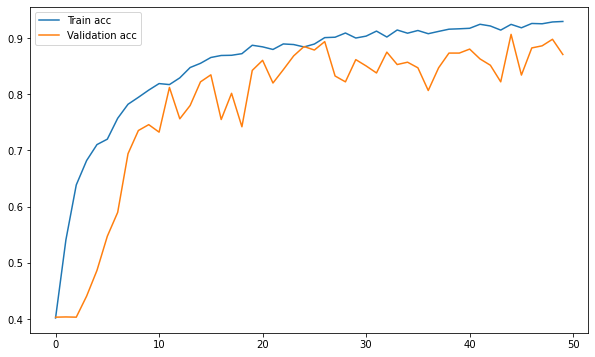

In [466]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.savefig('acc.jpg')

plt.show()

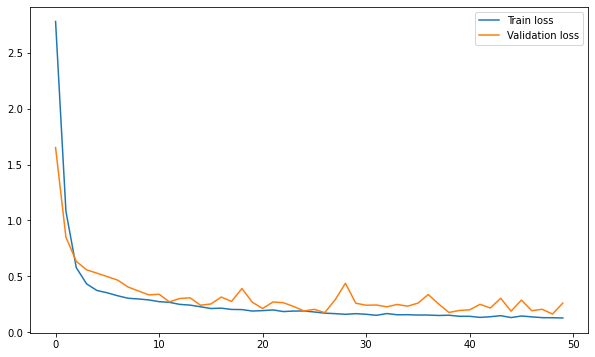

In [467]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.savefig('loss.jpg')
plt.show()

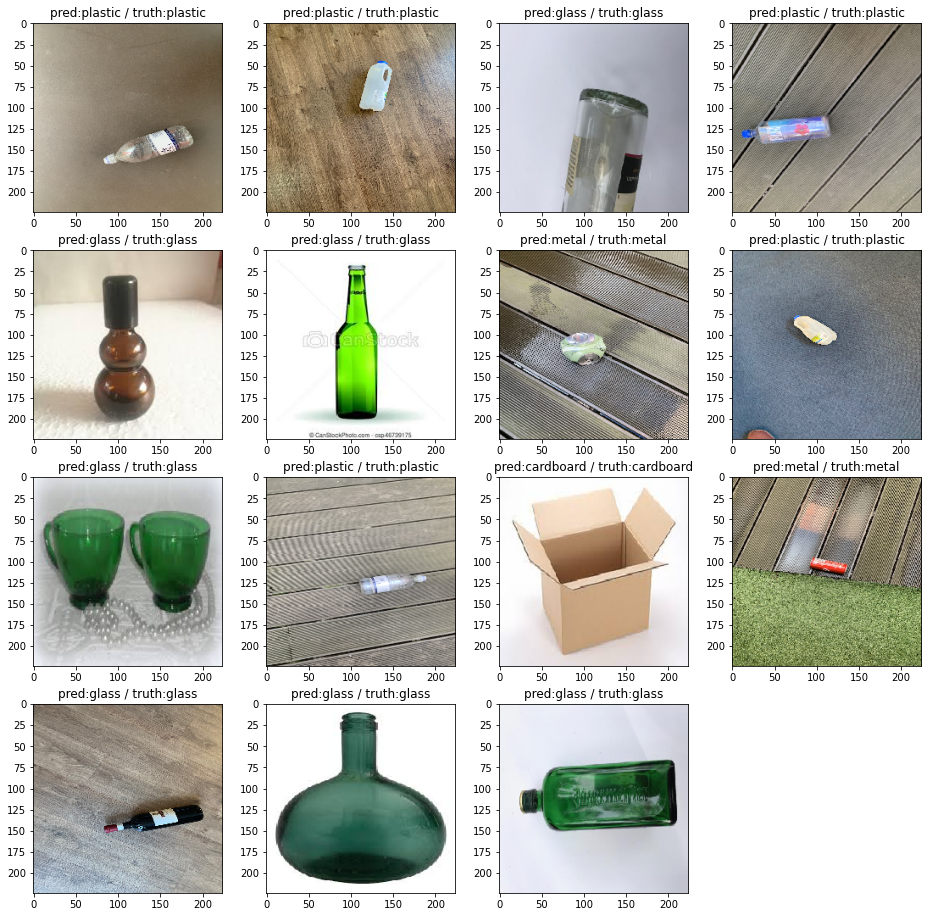

In [468]:
test_x, test_y = test_generator.__getitem__(1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [26]:
from keras.models import load_model

print("Evaluate on test data")
#loss , acc = model.evaluate(test_generator)
model = load_model('/home/devokba/Desktop/CNN/model.h5')
loss , acc = model.evaluate(test_generator)

print("test loss, test loss:", loss)
print("test loss, test acc:", acc)

#labels = (test_generator.class_indices)
#test_img, test_labels = next(test_generator)
#print(test_img)
#model.predict(test_img)
#model.predict('/home/devokba/Desktop/CNN/TRAIN/cardboard')


Evaluate on test data
19/19 [==============================] - 10s 492ms/step - loss: 0.1879 - accuracy: 0.9064
test loss, test loss: 0.1879281997680664
test loss, test acc: 0.9063670635223389


In [50]:
# Modify 'test1.jpg' and 'test2.jpg' to the images you want to predict on

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 224, 224

# load the model we saved
model = load_model('/home/devokba/Desktop/CNN/model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('/home/devokba/Downloads/a829b8b2bc763561b7bb13ca4badf603 copy.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
for index,cls in enumerate(classes[0]):
    if(cls==1):
        match index:
            case 0:
                print("cardboard")
            case 1:
                print("glass")
            case 2: 
                print("metal")
            case 3:
                print("plastic")
#classes = ['cardboard','glass','metal','plastic']



glass


In [47]:
# STORE THE MODEL AS A PICKLE OBJECT
import cv2
import numpy as np
from keras import models
import sys
from PIL import Image
#Load the saved model
model = models.load_model('model.h5')
# Start capturing Video through webcam
video = cv2.VideoCapture(0)
while True:
    _, frame = video.read()
    kernel = np.ones((3,3),np.uint8)
    try:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    except:
        break
# define range of skin color in HSV
    lower_skin = np.array([0,20,70], dtype=np.uint8)
    upper_skin = np.array([20,255,255], dtype=np.uint8)
#extract skin colur image
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
#extrapolate the hand to fill dark spots within
    mask = cv2.dilate(mask,kernel,iterations = 4)
#blur the image
    mask = cv2.GaussianBlur(mask,(5,5),100)
    mask = cv2.resize(mask,(224,224))
    img_array = np.array(mask)
    #print(img_array.shape)
# Changing dimension from 128x128 to 128x128x3
    img_array = np.stack((img_array,)*3, axis=-1)
    #Our keras model used a 4D tensor, (images x height x width x channel)
    #So changing dimension 128x128x3 into 1x128x128x3 
    img_array_ex = np.expand_dims(img_array, axis=0)
    #print(img_array_ex.shape)
    #Calling the predict method on model to predict gesture in the frame
    prediction = model.predict(img_array_ex)
    print(prediction)
    cv2.imshow("Capturing", frame)
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 

[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.2618673e-24]]
[[0. 0. 0. 1.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0

[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 0. 0. 1.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 0. 0. 1.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 

[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 0. 0. 1.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 

[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.03040271]]
[[0.01744225 0.8922878  0.0598672  0.030

[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 0. 0.]]
[[0. 1. 

In [86]:
import numpy as np
import cv2
import pickle

frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

# IMPORT THE TRANNIED MODEL
pickle_in=open("model_trained.p","rb")  ## rb = READ BYTE
model=pickle.load(pickle_in)
 
def grayscale(img):
img = cv2.imread(img)
return img

def equalize(img):
img =cv2.equalizeHist(img)
return img

def preprocessing(img):
img = equalize(img)
img = img/255

return img
def getCalssName(classNo):
if   classNo == 0: return 'Speed Limit 20 km/h'
elif classNo == 1: return 'Speed Limit 30 km/h'
elif classNo == 2: return 'Speed Limit 50 km/h'
elif classNo == 3: return 'Speed Limit 60 km/h'
elif classNo == 4: return 'Speed Limit 70 km/h'
elif classNo == 5: return 'Speed Limit 80 km/h'
elif classNo == 6: return 'End of Speed Limit 80 km/h'
elif classNo == 7: return 'Speed Limit 100 km/h'
elif classNo == 8: return 'Speed Limit 120 km/h'
elif classNo == 9: return 'No passing'
elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
elif classNo == 11: return 'Right-of-way at the next intersection'
elif classNo == 12: return 'Priority road'
elif classNo == 13: return 'Yield'
elif classNo == 14: return 'Stop'
elif classNo == 15: return 'No vechiles'
elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
elif classNo == 17: return 'No entry'
elif classNo == 18: return 'General caution'
elif classNo == 19: return 'Dangerous curve to the left'
elif classNo == 20: return 'Dangerous curve to the right'
elif classNo == 21: return 'Double curve'
elif classNo == 22: return 'Bumpy road'
elif classNo == 23: return 'Slippery road'
elif classNo == 24: return 'Road narrows on the right'
elif classNo == 25: return 'Road work'
elif classNo == 26: return 'Traffic signals'
elif classNo == 27: return 'Pedestrians'
elif classNo == 28: return 'Children crossing'
elif classNo == 29: return 'Bicycles crossing'
elif classNo == 30: return 'Beware of ice/snow'
elif classNo == 31: return 'Wild animals crossing'
elif classNo == 32: return 'End of all speed and passing limits'
elif classNo == 33: return 'Turn right ahead'
elif classNo == 34: return 'Turn left ahead'
elif classNo == 35: return 'Ahead only'
elif classNo == 36: return 'Go straight or right'
elif classNo == 37: return 'Go straight or left'
elif classNo == 38: return 'Keep right'
elif classNo == 39: return 'Keep left'
elif classNo == 40: return 'Roundabout mandatory'
elif classNo == 41: return 'End of no passing'
elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
 
while True:
 
# READ IMAGE
success, imgOrignal = cap.read()
 
# PROCESS IMAGE
img = np.asarray(imgOrignal)
img = cv2.resize(img, (128, 128,3))
img = preprocessing(img)
cv2.imshow("Processed Image", img)
img = img.reshape(128, 128, 3)
cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# PREDICT IMAGE
predictions = model.predict(img)
classIndex = model.predict_classes(img)
probabilityValue =np.amax(predictions)
if probabilityValue > threshold:
#print(getCalssName(classIndex))
cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.imshow("Result", imgOrignal)
 
if cv2.waitKey(1) and 0xFF == ord('q'):
break

IndentationError: expected an indented block after function definition on line 21 (3604026307.py, line 22)

In [459]:
for layer in vgg.layers:
  layer.trainable = False

[ WARN:0@39491.851] global /io/opencv/modules/videoio/src/cap_v4l.cpp (889) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [453]:
import cv2
import numpy as np
from keras import models
import sys
from PIL import Image
import time

#Load the saved model
model = models.load_model('model.h5')
# Start capturing Video through webcam
video = cv2.VideoCapture(0)

while True:
 
# READ IMAGE
success, imgOrignal = cap.read()
 
# PROCESS IMAGE
img = np.asarray(imgOrignal)
img = cv2.resize(img, (224, 224,3))
img = preprocessing(img)
cv2.imshow("Processed Image", img)
img = img.reshape(224, 224, 3)
cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# PREDICT IMAGE
predictions = model.predict(img)
classIndex = model.predict_classes(img)
probabilityValue =np.amax(predictions)
if probabilityValue > threshold:
#print(getCalssName(classIndex))
cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.imshow("Result", imgOrignal)
 
if cv2.waitKey(1) and 0xFF == ord('q'):
break

IndentationError: expected an indented block after 'while' statement on line 13 (1734495767.py, line 16)

In [46]:
%%javascript

window.scroll_flag = true
window.scroll_exit = false
window.scroll_delay = 100

$(".output_scroll").each(function() {
    $(this)[0].scrollTop = $(this)[0].scrollHeight;
});

function callScrollToBottom() {
    setTimeout(scrollToBottom, window.scroll_delay);
}

function scrollToBottom() {
    if (window.scroll_exit) {
        return;
    }
    if (!window.scroll_flag) {
        callScrollToBottom();
        return;
    };
    
    $(".output_scroll").each(function() {
        if (!$(this).attr('scroll_checkbox')){
            window.scroll_flag = true;
            $(this).attr('scroll_checkbox',true);
            var div = document.createElement('div');
            var checkbox = document.createElement('input');
            checkbox.type = "checkbox";
            checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
            checkbox.checked = "checked"
            div.append("Auto-Scroll-To-Bottom: ");
            div.append(checkbox);
            $(this).parent().before(div);
        }
        
        $(this)[0].scrollTop = $(this)[0].scrollHeight;
    });
    callScrollToBottom();
}
scrollToBottom();

<IPython.core.display.Javascript object>